In [1]:
import pandas as pd
import numpy as np
from typing import Dict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier, early_stopping
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

In [3]:
d_code = pd.read_csv('../data/속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('../data/속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('../data/속성_L_코드.csv', index_col=0).T.to_dict()

df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

df = add_code(df_train, d_code, h_code, l_code)
test = add_code(df_test, d_code, h_code, l_code)

In [4]:
print(df.shape)
print(test.shape)

(501951, 63)
(46404, 62)


# 데이터 전처리

Class Count 
 0    251106
1    250845
Name: target, dtype: int64 

Label1 50.03 % of the dataset
Lable2 49.97 % of the dataset


<AxesSubplot:title={'center':'Class Distributions \n (0: Unused || 1: Used)'}, xlabel='target', ylabel='count'>

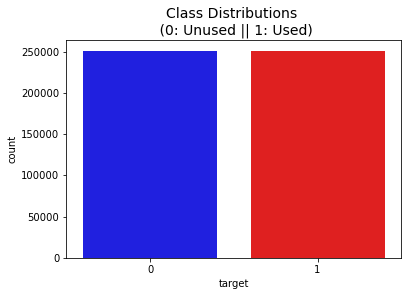

In [5]:
print('Class Count','\n',df['target'].value_counts(),'\n')
print('Label1', round(df['target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Lable2', round(df['target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
plt.title('Class Distributions \n (0: Unused || 1: Used)', fontsize=14)
colors = ["blue", "red"]
sns.countplot(df['target'],palette=colors)

In [6]:
drop_columns = ['id','person_rn','contents_rn','contents_open_dt', 'person_prefer_f','person_prefer_g']
df = df.drop(drop_columns,axis=1)

In [7]:
pd.set_option('display.max_columns', None)
df.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
5,False,False,False,True,False,False,1,1,2,5,175,181,114,4,72,227,2,3,3,5,1,1,2,1608,275,1,4,74,1,175,152,56,1,175,152,56,1,114,109,56,1,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
6,False,False,False,True,False,False,2,0,3,5,672,180,740,3,49,251,258,3,3,3,1,3,2,1817,492,5,5,53,0,672,660,659,618,175,152,56,1,740,735,716,618,490,490,482,482,48,359,250,518,250,523,48,363,1812,1811,1810,2020
7,True,False,False,True,False,False,1,2,2,1,372,299,147,5,126,139,96,3,1,10,2,1,2,1608,275,5,4,133,1,369,368,297,216,299,298,297,216,145,123,56,1,275,274,274,216,94,412,94,422,94,399,94,417,1607,1606,1605,2016
8,True,True,False,True,False,False,1,1,2,5,1027,1229,929,5,138,68,109,3,3,5,1,1,2,534,1028,1,6,139,0,1027,1026,1000,926,1227,1227,1227,926,929,928,927,926,1027,1026,1000,926,94,421,58,376,94,403,94,422,529,528,527,2006
9,False,False,False,True,False,False,1,5,2,1,851,698,1228,5,116,127,139,2,3,5,1,1,2,722,1228,1,4,139,0,847,847,824,744,697,691,690,618,1227,1227,1227,926,1227,1227,1227,926,94,407,94,413,94,422,94,422,721,694,693,2006


In [8]:
encoder = LabelEncoder()
list1 = ['d_l_match_yn','d_m_match_yn','d_s_match_yn','h_l_match_yn','h_m_match_yn','h_s_match_yn']
for i in list1:
    df[i] = encoder.fit_transform(df[i])

df.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016
5,0,0,0,1,0,0,1,1,2,5,175,181,114,4,72,227,2,3,3,5,1,1,2,1608,275,1,4,74,1,175,152,56,1,175,152,56,1,114,109,56,1,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
6,0,0,0,1,0,0,2,0,3,5,672,180,740,3,49,251,258,3,3,3,1,3,2,1817,492,5,5,53,0,672,660,659,618,175,152,56,1,740,735,716,618,490,490,482,482,48,359,250,518,250,523,48,363,1812,1811,1810,2020
7,1,0,0,1,0,0,1,2,2,1,372,299,147,5,126,139,96,3,1,10,2,1,2,1608,275,5,4,133,1,369,368,297,216,299,298,297,216,145,123,56,1,275,274,274,216,94,412,94,422,94,399,94,417,1607,1606,1605,2016
8,1,1,0,1,0,0,1,1,2,5,1027,1229,929,5,138,68,109,3,3,5,1,1,2,534,1028,1,6,139,0,1027,1026,1000,926,1227,1227,1227,926,929,928,927,926,1027,1026,1000,926,94,421,58,376,94,403,94,422,529,528,527,2006
9,0,0,0,1,0,0,1,5,2,1,851,698,1228,5,116,127,139,2,3,5,1,1,2,722,1228,1,4,139,0,847,847,824,744,697,691,690,618,1227,1227,1227,926,1227,1227,1227,926,94,407,94,413,94,422,94,422,721,694,693,2006


In [9]:
df.shape

(501951, 57)

In [10]:
X = df.drop(['target'],axis=1,inplace=False)
y = df['target']

In [11]:
X.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016


In [12]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [13]:
# train, test 분리
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# 검증세트 분할하기
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify=y_train_all, test_size=0.2)
print(len(X_train), len(X_val))

321248 80312


In [14]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    f1 = f1_score(y_test,pred)
    print('F1:',f1.round(3))

# lightgbm

In [15]:
# optuna로 구한 최적 하이퍼 파라미터로 설정
lgb_clf = LGBMClassifier(device_type="gpu", n_estimators=1000, learning_rate=  0.0171335281627568, 
                         lambda_l1=0.025693077514813787, lambda_l2=0.00012845517483705768, 
                         num_leaves=413, feature_fraction=0.21333154034432134, bagging_fraction=0.20858030566544028,
                         bagging_freq=0, min_child_samples=45, objective='binary')

# XGBoost

In [16]:
# optuna로 구한 최적 하이퍼 파라미터로 설정
xgb_clf = XGBClassifier(tree_method = "gpu_hist", learning_rate=0.01980293560464339, n_estimators=1400,
                        sub_sample=0.8, colsample_bytree=0.6, eta = 0.0015070094258635845, reg_alpha=12, reg_lambda=22, 
                        max_depth=15, min_child_weight=7, objective='binary:logistic')

# catboost

In [17]:
# optuna로 구한 최적 하이퍼 파라미터로 설정
cat_clf = CatBoostClassifier(n_estimators=500, depth=10, learning_rate=0.13962563737015762, random_strength=94, 
                             bagging_temperature=37.95853142670641, od_type='Iter', eval_metric='Logloss')

# mlxtend Stacking

In [19]:
clf1 = lgb_clf
clf2 = xgb_clf
clf3 = cat_clf
meta = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            use_probas=True,
                            meta_classifier=meta,
                            random_state=42)
sclf_fit = sclf.fit(X_train_all, y_train_all)
pred = sclf_fit.predict(X_test)
get_clf_eval(y_test,pred)

[LightGBM] [Warning] feature_fraction is set=0.21333154034432134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21333154034432134
[LightGBM] [Warning] lambda_l1 is set=0.025693077514813787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025693077514813787
[LightGBM] [Warning] bagging_fraction is set=0.20858030566544028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20858030566544028
[LightGBM] [Warning] lambda_l2 is set=0.00012845517483705768, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012845517483705768
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.21333154034432134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21333154034432134
[LightGBM] [Warning] lambda_l1 is set=0.025693077514813787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025693077514813787
[LightGBM] [War

24:	learn: 0.6701830	total: 2.07s	remaining: 39.4s
25:	learn: 0.6698565	total: 2.15s	remaining: 39.2s
26:	learn: 0.6683132	total: 2.23s	remaining: 39s
27:	learn: 0.6680950	total: 2.3s	remaining: 38.7s
28:	learn: 0.6676806	total: 2.37s	remaining: 38.5s
29:	learn: 0.6663715	total: 2.45s	remaining: 38.3s
30:	learn: 0.6657457	total: 2.52s	remaining: 38.2s
31:	learn: 0.6652387	total: 2.6s	remaining: 38s
32:	learn: 0.6650038	total: 2.67s	remaining: 37.8s
33:	learn: 0.6641782	total: 2.74s	remaining: 37.6s
34:	learn: 0.6638856	total: 2.82s	remaining: 37.4s
35:	learn: 0.6632361	total: 2.89s	remaining: 37.2s
36:	learn: 0.6627215	total: 2.97s	remaining: 37.1s
37:	learn: 0.6627129	total: 2.98s	remaining: 36.2s
38:	learn: 0.6623521	total: 3.05s	remaining: 36.1s
39:	learn: 0.6615335	total: 3.13s	remaining: 36s
40:	learn: 0.6610656	total: 3.2s	remaining: 35.8s
41:	learn: 0.6607209	total: 3.27s	remaining: 35.7s
42:	learn: 0.6604314	total: 3.35s	remaining: 35.6s
43:	learn: 0.6600454	total: 3.42s	remain

187:	learn: 0.6034057	total: 14.5s	remaining: 24.1s
188:	learn: 0.6029654	total: 14.6s	remaining: 24.1s
189:	learn: 0.6027517	total: 14.7s	remaining: 24s
190:	learn: 0.6023692	total: 14.8s	remaining: 23.9s
191:	learn: 0.6020231	total: 14.8s	remaining: 23.8s
192:	learn: 0.6017546	total: 14.9s	remaining: 23.7s
193:	learn: 0.6013580	total: 15s	remaining: 23.7s
194:	learn: 0.6009078	total: 15.1s	remaining: 23.7s
195:	learn: 0.6005536	total: 15.2s	remaining: 23.6s
196:	learn: 0.6003415	total: 15.3s	remaining: 23.5s
197:	learn: 0.6000554	total: 15.4s	remaining: 23.4s
198:	learn: 0.5997492	total: 15.4s	remaining: 23.4s
199:	learn: 0.5994098	total: 15.5s	remaining: 23.3s
200:	learn: 0.5991063	total: 15.6s	remaining: 23.2s
201:	learn: 0.5989073	total: 15.7s	remaining: 23.1s
202:	learn: 0.5984288	total: 15.8s	remaining: 23s
203:	learn: 0.5980891	total: 15.8s	remaining: 23s
204:	learn: 0.5976281	total: 15.9s	remaining: 22.9s
205:	learn: 0.5973261	total: 16s	remaining: 22.8s
206:	learn: 0.5969983	

346:	learn: 0.5575750	total: 27.3s	remaining: 12s
347:	learn: 0.5572299	total: 27.3s	remaining: 11.9s
348:	learn: 0.5570084	total: 27.4s	remaining: 11.9s
349:	learn: 0.5567445	total: 27.5s	remaining: 11.8s
350:	learn: 0.5564699	total: 27.6s	remaining: 11.7s
351:	learn: 0.5562429	total: 27.7s	remaining: 11.6s
352:	learn: 0.5559189	total: 27.7s	remaining: 11.5s
353:	learn: 0.5556726	total: 27.8s	remaining: 11.5s
354:	learn: 0.5554329	total: 27.9s	remaining: 11.4s
355:	learn: 0.5552594	total: 28s	remaining: 11.3s
356:	learn: 0.5550587	total: 28.1s	remaining: 11.2s
357:	learn: 0.5548012	total: 28.1s	remaining: 11.2s
358:	learn: 0.5547007	total: 28.2s	remaining: 11.1s
359:	learn: 0.5544819	total: 28.3s	remaining: 11s
360:	learn: 0.5542939	total: 28.4s	remaining: 10.9s
361:	learn: 0.5540900	total: 28.4s	remaining: 10.8s
362:	learn: 0.5537368	total: 28.5s	remaining: 10.8s
363:	learn: 0.5535650	total: 28.6s	remaining: 10.7s
364:	learn: 0.5533016	total: 28.7s	remaining: 10.6s
365:	learn: 0.5530

6:	learn: 0.6817808	total: 529ms	remaining: 37.3s
7:	learn: 0.6808092	total: 602ms	remaining: 37s
8:	learn: 0.6799342	total: 675ms	remaining: 36.8s
9:	learn: 0.6794962	total: 746ms	remaining: 36.6s
10:	learn: 0.6787469	total: 823ms	remaining: 36.6s
11:	learn: 0.6780623	total: 897ms	remaining: 36.5s
12:	learn: 0.6772176	total: 972ms	remaining: 36.4s
13:	learn: 0.6764940	total: 1.05s	remaining: 36.4s
14:	learn: 0.6754678	total: 1.15s	remaining: 37s
15:	learn: 0.6743935	total: 1.23s	remaining: 37.3s
16:	learn: 0.6736367	total: 1.33s	remaining: 37.9s
17:	learn: 0.6734072	total: 1.41s	remaining: 37.8s
18:	learn: 0.6729342	total: 1.48s	remaining: 37.6s
19:	learn: 0.6717298	total: 1.56s	remaining: 37.4s
20:	learn: 0.6712707	total: 1.63s	remaining: 37.2s
21:	learn: 0.6708811	total: 1.71s	remaining: 37.1s
22:	learn: 0.6704894	total: 1.78s	remaining: 36.9s
23:	learn: 0.6701116	total: 1.85s	remaining: 36.8s
24:	learn: 0.6697382	total: 1.93s	remaining: 36.7s
25:	learn: 0.6694098	total: 2s	remainin

167:	learn: 0.6097360	total: 12.8s	remaining: 25.2s
168:	learn: 0.6093164	total: 12.8s	remaining: 25.2s
169:	learn: 0.6090647	total: 12.9s	remaining: 25.1s
170:	learn: 0.6087702	total: 13s	remaining: 25s
171:	learn: 0.6084556	total: 13.1s	remaining: 24.9s
172:	learn: 0.6082962	total: 13.2s	remaining: 24.9s
173:	learn: 0.6081027	total: 13.3s	remaining: 24.8s
174:	learn: 0.6077119	total: 13.3s	remaining: 24.8s
175:	learn: 0.6074092	total: 13.4s	remaining: 24.7s
176:	learn: 0.6069901	total: 13.5s	remaining: 24.6s
177:	learn: 0.6065496	total: 13.6s	remaining: 24.5s
178:	learn: 0.6063475	total: 13.6s	remaining: 24.4s
179:	learn: 0.6059726	total: 13.7s	remaining: 24.4s
180:	learn: 0.6057086	total: 13.8s	remaining: 24.3s
181:	learn: 0.6052931	total: 13.9s	remaining: 24.2s
182:	learn: 0.6050625	total: 13.9s	remaining: 24.1s
183:	learn: 0.6045031	total: 14s	remaining: 24.1s
184:	learn: 0.6042464	total: 14.1s	remaining: 24s
185:	learn: 0.6038936	total: 14.2s	remaining: 23.9s
186:	learn: 0.603707

326:	learn: 0.5628633	total: 25.3s	remaining: 13.4s
327:	learn: 0.5624982	total: 25.3s	remaining: 13.3s
328:	learn: 0.5623401	total: 25.4s	remaining: 13.2s
329:	learn: 0.5621983	total: 25.5s	remaining: 13.1s
330:	learn: 0.5618765	total: 25.6s	remaining: 13.1s
331:	learn: 0.5615127	total: 25.6s	remaining: 13s
332:	learn: 0.5613333	total: 25.7s	remaining: 12.9s
333:	learn: 0.5610085	total: 25.8s	remaining: 12.8s
334:	learn: 0.5608394	total: 25.9s	remaining: 12.7s
335:	learn: 0.5606171	total: 25.9s	remaining: 12.7s
336:	learn: 0.5603975	total: 26s	remaining: 12.6s
337:	learn: 0.5602049	total: 26.1s	remaining: 12.5s
338:	learn: 0.5599357	total: 26.2s	remaining: 12.5s
339:	learn: 0.5596015	total: 26.3s	remaining: 12.4s
340:	learn: 0.5592098	total: 26.4s	remaining: 12.3s
341:	learn: 0.5590153	total: 26.5s	remaining: 12.2s
342:	learn: 0.5586622	total: 26.5s	remaining: 12.2s
343:	learn: 0.5584363	total: 26.6s	remaining: 12.1s
344:	learn: 0.5581927	total: 26.7s	remaining: 12s
345:	learn: 0.5577

485:	learn: 0.5247845	total: 37.8s	remaining: 1.09s
486:	learn: 0.5244748	total: 37.9s	remaining: 1.01s
487:	learn: 0.5243038	total: 37.9s	remaining: 933ms
488:	learn: 0.5241565	total: 38s	remaining: 855ms
489:	learn: 0.5239543	total: 38.1s	remaining: 777ms
490:	learn: 0.5237213	total: 38.2s	remaining: 700ms
491:	learn: 0.5235329	total: 38.2s	remaining: 622ms
492:	learn: 0.5232100	total: 38.3s	remaining: 544ms
493:	learn: 0.5229922	total: 38.4s	remaining: 466ms
494:	learn: 0.5226616	total: 38.5s	remaining: 389ms
495:	learn: 0.5224973	total: 38.5s	remaining: 311ms
496:	learn: 0.5221942	total: 38.6s	remaining: 233ms
497:	learn: 0.5218692	total: 38.7s	remaining: 155ms
498:	learn: 0.5216488	total: 38.8s	remaining: 77.7ms
499:	learn: 0.5214797	total: 38.8s	remaining: 0us
[LightGBM] [Warning] feature_fraction is set=0.21333154034432134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21333154034432134
[LightGBM] [Warning] lambda_l1 is set=0.025693077514813787, reg_alp

91:	learn: 0.6506715	total: 9.54s	remaining: 42.3s
92:	learn: 0.6505360	total: 9.64s	remaining: 42.2s
93:	learn: 0.6503457	total: 9.74s	remaining: 42.1s
94:	learn: 0.6501642	total: 9.84s	remaining: 42s
95:	learn: 0.6500508	total: 9.95s	remaining: 41.9s
96:	learn: 0.6497271	total: 10.1s	remaining: 41.8s
97:	learn: 0.6495696	total: 10.2s	remaining: 41.7s
98:	learn: 0.6491511	total: 10.3s	remaining: 41.6s
99:	learn: 0.6489921	total: 10.4s	remaining: 41.4s
100:	learn: 0.6486667	total: 10.5s	remaining: 41.3s
101:	learn: 0.6483529	total: 10.6s	remaining: 41.2s
102:	learn: 0.6482503	total: 10.7s	remaining: 41.1s
103:	learn: 0.6481160	total: 10.8s	remaining: 41s
104:	learn: 0.6479343	total: 10.9s	remaining: 40.9s
105:	learn: 0.6475858	total: 11s	remaining: 40.8s
106:	learn: 0.6472376	total: 11.1s	remaining: 40.9s
107:	learn: 0.6471080	total: 11.3s	remaining: 40.9s
108:	learn: 0.6469056	total: 11.4s	remaining: 40.8s
109:	learn: 0.6465433	total: 11.5s	remaining: 40.7s
110:	learn: 0.6464075	total

251:	learn: 0.6102813	total: 27.5s	remaining: 27s
252:	learn: 0.6100788	total: 27.6s	remaining: 26.9s
253:	learn: 0.6099011	total: 27.7s	remaining: 26.8s
254:	learn: 0.6097033	total: 27.8s	remaining: 26.7s
255:	learn: 0.6095356	total: 27.9s	remaining: 26.6s
256:	learn: 0.6093524	total: 28.1s	remaining: 26.5s
257:	learn: 0.6090908	total: 28.2s	remaining: 26.5s
258:	learn: 0.6088507	total: 28.3s	remaining: 26.3s
259:	learn: 0.6086238	total: 28.4s	remaining: 26.2s
260:	learn: 0.6083678	total: 28.5s	remaining: 26.1s
261:	learn: 0.6082512	total: 28.6s	remaining: 26s
262:	learn: 0.6081393	total: 28.8s	remaining: 25.9s
263:	learn: 0.6079483	total: 28.9s	remaining: 25.8s
264:	learn: 0.6078009	total: 29s	remaining: 25.7s
265:	learn: 0.6075671	total: 29.1s	remaining: 25.6s
266:	learn: 0.6073901	total: 29.2s	remaining: 25.5s
267:	learn: 0.6072643	total: 29.3s	remaining: 25.4s
268:	learn: 0.6070178	total: 29.4s	remaining: 25.3s
269:	learn: 0.6068630	total: 29.5s	remaining: 25.2s
270:	learn: 0.6066

411:	learn: 0.5831767	total: 45.3s	remaining: 9.67s
412:	learn: 0.5830108	total: 45.4s	remaining: 9.56s
413:	learn: 0.5827161	total: 45.5s	remaining: 9.45s
414:	learn: 0.5825311	total: 45.6s	remaining: 9.34s
415:	learn: 0.5824002	total: 45.7s	remaining: 9.23s
416:	learn: 0.5822390	total: 45.8s	remaining: 9.12s
417:	learn: 0.5821315	total: 45.9s	remaining: 9.01s
418:	learn: 0.5820310	total: 46s	remaining: 8.9s
419:	learn: 0.5819484	total: 46.1s	remaining: 8.79s
420:	learn: 0.5817984	total: 46.2s	remaining: 8.68s
421:	learn: 0.5816374	total: 46.3s	remaining: 8.57s
422:	learn: 0.5814359	total: 46.5s	remaining: 8.46s
423:	learn: 0.5813135	total: 46.6s	remaining: 8.35s
424:	learn: 0.5811477	total: 46.7s	remaining: 8.23s
425:	learn: 0.5810427	total: 46.8s	remaining: 8.12s
426:	learn: 0.5808829	total: 46.9s	remaining: 8.01s
427:	learn: 0.5807344	total: 47s	remaining: 7.91s
428:	learn: 0.5805040	total: 47.1s	remaining: 7.8s
429:	learn: 0.5803949	total: 47.3s	remaining: 7.69s
430:	learn: 0.5802

In [20]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값',custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_c1)
        print('\n')

In [21]:
pred_proba = sclf_fit.predict_proba(X_test)[:,1]
thresholds = [0.3,0.35,0.38,0.4,0.45,0.5,0.55,0.6]
get_eval_by_threshold(y_test,pred_proba.reshape(-1,1),thresholds)

[LightGBM] [Warning] feature_fraction is set=0.21333154034432134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21333154034432134
[LightGBM] [Warning] lambda_l1 is set=0.025693077514813787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025693077514813787
[LightGBM] [Warning] bagging_fraction is set=0.20858030566544028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20858030566544028
[LightGBM] [Warning] lambda_l2 is set=0.00012845517483705768, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012845517483705768
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
임계값 0.3
F1: 0.694


임계값 0.35
F1: 0.697


임계값 0.38
F1: 0.695


임계값 0.4
F1: 0.693


임계값 0.45
F1: 0.681


임계값 0.5
F1: 0.654


임계값 0.55
F1: 0.603


임계값 0.6
F1: 0.518




# 테스트 데이터 전처리

In [22]:
# 학습에 불필요한 열인 id, person_rn(사용자번호), contents_rn(컨텐츠번호), contents_open_df(컨텐츠 열람 일시) 제거
drop_columns = ['id','person_rn','contents_rn','contents_open_dt', 'person_prefer_f','person_prefer_g']
test = test.drop(drop_columns,axis=1)
test

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,1146,1128,1021,2010
1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,1610,1606,1605,2016
2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,1812,1811,1810,2020
3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,101,100,99,2006
4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,984,980,954,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,True,True,True,False,False,False,2,0,4,1,147,46,145,4,2,4,95,3,3,5,1,1,2,759,147,1,5,91,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,1,315,3,316,94,398,85,396,759,759,759,2006
46400,True,False,False,True,False,False,2,0,4,1,176,120,159,4,86,31,278,3,3,10,2,1,2,759,147,1,4,91,175,152,56,1,114,109,56,1,159,152,56,1,145,123,56,1,85,391,30,342,277,542,85,396,759,759,759,2006
46401,True,True,False,True,True,True,2,0,3,1,145,46,147,5,288,279,278,3,3,10,2,1,2,759,147,1,4,288,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,759,759,759,2006
46402,True,True,False,True,True,True,1,3,3,2,145,46,147,6,288,279,278,3,1,5,1,3,2,759,147,1,5,288,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,277,547,277,543,277,542,277,547,759,759,759,2006


In [23]:
for i in list1:
    test[i] = encoder.fit_transform(test[i])

test.head(10)

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,1,0,0,1,1,1,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,1146,1128,1021,2010
1,0,0,0,1,0,0,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,1610,1606,1605,2016
2,1,0,0,1,1,1,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,1812,1811,1810,2020
3,1,0,0,1,1,1,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,101,100,99,2006
4,1,0,0,1,0,0,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,984,980,954,2009
5,0,0,0,0,0,0,1,2,3,1,181,175,114,4,171,190,93,3,1,5,1,3,2,1463,1095,1,4,93,175,152,56,1,175,152,56,1,114,109,56,1,1095,1094,1093,926,169,452,188,464,92,397,92,397,1462,1459,1458,2013
6,0,0,0,1,0,0,2,0,4,5,800,182,819,4,79,93,93,2,3,5,1,1,2,953,1097,1,4,83,800,783,745,744,182,152,56,1,819,815,745,744,1097,1094,1093,926,78,385,92,397,92,397,78,389,952,951,930,2009
7,1,0,0,1,0,0,2,0,4,5,461,101,180,4,38,36,45,1,1,3,1,3,2,1851,453,4,3,44,461,451,450,377,101,91,56,1,175,152,56,1,452,451,450,377,30,349,30,347,30,356,30,355,1846,1843,1832,2020
8,1,0,0,1,0,0,2,0,4,5,436,464,396,3,31,278,86,3,3,9,2,3,2,1851,453,1,2,44,436,431,378,377,464,463,450,377,396,396,378,377,452,451,450,377,30,342,277,542,85,391,30,355,1846,1843,1832,2020
9,0,0,0,0,0,0,1,7,2,5,923,896,851,6,59,95,4,1,3,10,2,1,2,530,1228,5,4,117,923,923,864,864,895,884,864,864,847,847,824,744,1227,1227,1227,926,58,368,94,398,3,316,94,407,529,528,527,2006


# stacking classifier 최종 예측

In [25]:
final_pred = sclf_fit.predict_proba(test)[:,1]
final_pred

[LightGBM] [Warning] feature_fraction is set=0.21333154034432134, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21333154034432134
[LightGBM] [Warning] lambda_l1 is set=0.025693077514813787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025693077514813787
[LightGBM] [Warning] bagging_fraction is set=0.20858030566544028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20858030566544028
[LightGBM] [Warning] lambda_l2 is set=0.00012845517483705768, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012845517483705768
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


array([0.62820495, 0.40725391, 0.40755341, ..., 0.66628934, 0.63997004,
       0.65696737])

In [26]:
threshold=0.35
final_pred = np.where(final_pred >= threshold , 1, 0)
final_pred

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
sample_submission = pd.read_csv("../data/sample_submission.csv")
sample_submission['target'] = final_pred
sample_submission

,id,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [30]:
sample_submission['target'].value_counts()

1    37564
0     8840
Name: target, dtype: int64

In [31]:
sample_submission.to_csv('sample_submission(stacking).csv', index=False, encoding='utf-8-sig')